In [1]:
from sklearn import datasets as ds
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

In [2]:
boston = ds.load_boston()
X, y = boston.data, boston.target

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
X[:5,:6]

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00],
       [2.731e-02, 0.000e+00, 7.070e+00, 0.000e+00, 4.690e-01, 6.421e+00],
       [2.729e-02, 0.000e+00, 7.070e+00, 0.000e+00, 4.690e-01, 7.185e+00],
       [3.237e-02, 0.000e+00, 2.180e+00, 0.000e+00, 4.580e-01, 6.998e+00],
       [6.905e-02, 0.000e+00, 2.180e+00, 0.000e+00, 4.580e-01, 7.147e+00]])

In [5]:
y[:100]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

(404, 13) (404,)


In [7]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
linReg.score(X_test, y_test)

0.6687594935356329

## X(rooms)とy(price)

In [9]:
X_rm = X[:, 5].reshape(506, 1)
X_rm[:5]

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147]])

In [10]:
# 境界値を削除
X_rm_02 = X_rm[y != 50]
y_02 = y[y != 50]

In [11]:
y_02[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [12]:
linear_rm = LinearRegression()
linear_rm.fit(X_rm_02, y_02)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
linear_rm.score(X_rm_02, y_02)

0.4714666814451759

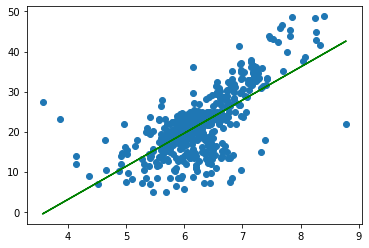

In [14]:
plt.scatter(X_rm_02, y_02)
plt.plot(X_rm_02, linear_rm.predict(X_rm_02), color="g")

## dataset => dataframe

In [15]:
import pandas as pd

In [16]:
df_boston = pd.DataFrame(X, columns=boston.feature_names)

In [17]:
df_boston['price'] = y

In [18]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [19]:
X_df_rm = np.array(df_boston['RM']).reshape(506, -1)
y_df = df_boston['price']

In [20]:
X_df_rm[:10]

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004]])

In [21]:
print(X_df_rm.shape, y_df.shape)

(506, 1) (506,)


In [22]:
df_linear = LinearRegression()

In [23]:
df_linear.fit(X_df_rm, y_df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

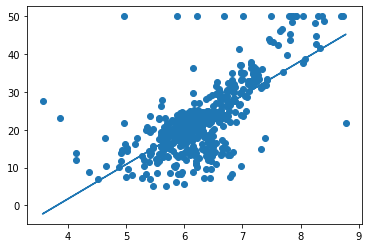

In [24]:
plt.scatter(X_df_rm, y_df)
plt.plot(X_df_rm, df_linear.predict(X_df_rm))

#### 境界を削除

In [25]:
y_df == 50.0

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: price, Length: 506, dtype: bool

In [26]:
y_df[y_df != 50.0].shape

(490,)

In [27]:
X_df_rm02 = X_df_rm[y_df != 50.0]
y_df02 = y_df[y_df != 50.0]

In [28]:
X_df_rm02.shape, y_df02.shape

((490, 1), (490,))

In [29]:
df_linear02 = LinearRegression()
df_linear02.fit(X_df_rm02, y_df02)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

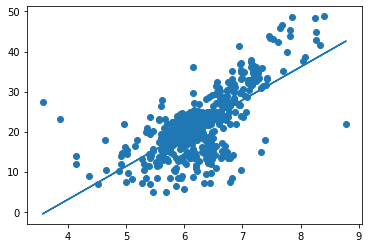

In [30]:
plt.scatter(X_df_rm02, y_df02)
plt.plot(X_df_rm02, df_linear02.predict(X_df_rm02))